In [1]:
!pip -q install "transformers>=4.41" accelerate bitsandbytes pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.5 MB/s eta 0:00:00


Saving a6f1c063013308b161fadc9b99bd4dfe.jpg to a6f1c063013308b161fadc9b99bd4dfe.jpg


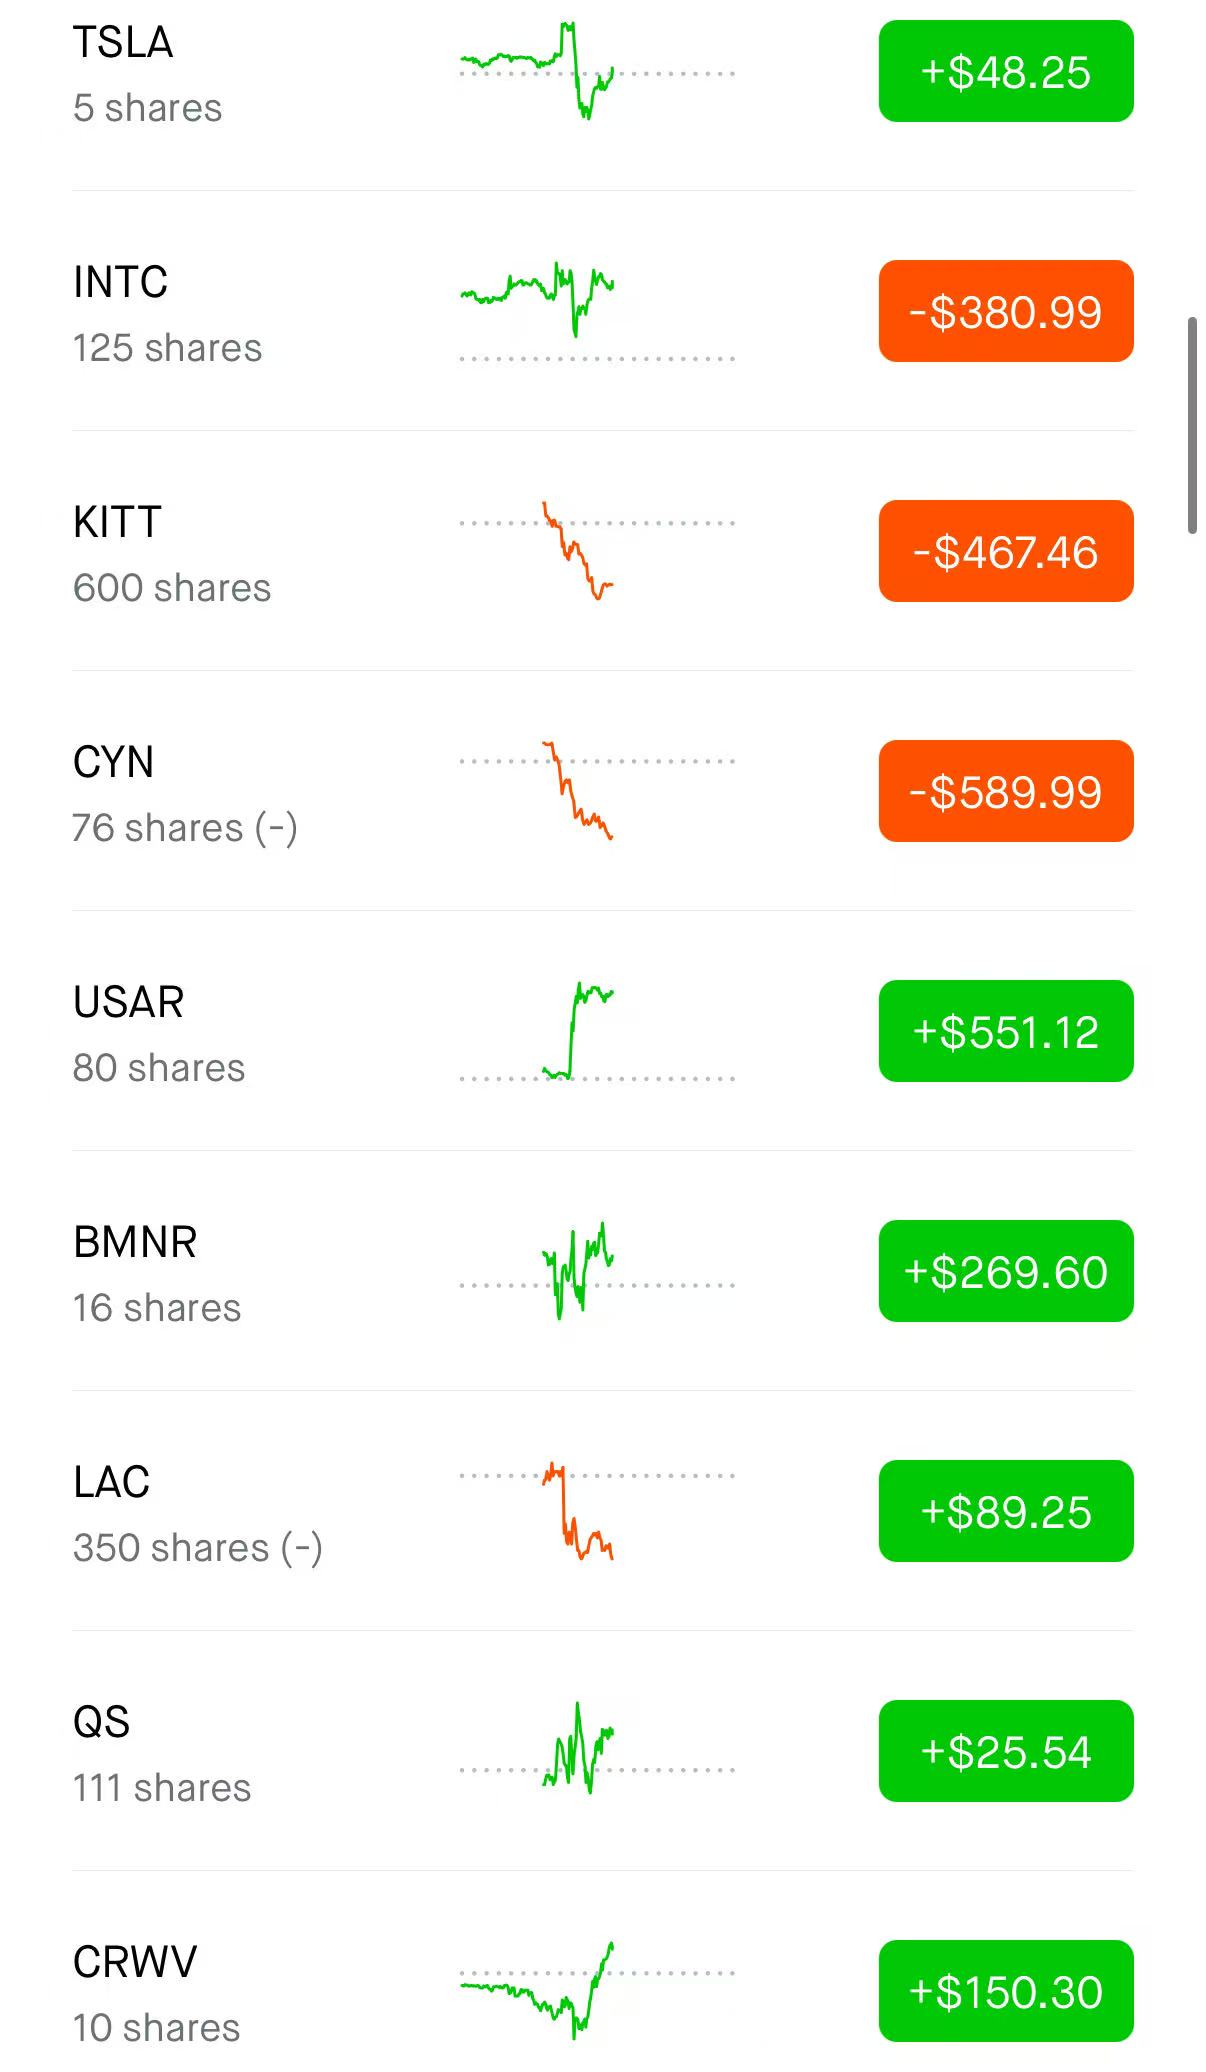

✅ Loaded image
• path: /content/a6f1c063013308b161fadc9b99bd4dfe.jpg
• size (W,H): (1206, 2072)
• mode: RGB


In [22]:

from google.colab import files
from PIL import Image, ImageOps
import os

uploaded = files.upload()          # pick your screenshot
img_path = next(iter(uploaded))    # first file name

# Open + normalize + display
img = Image.open(img_path).convert("RGB")
display(img)

print("✅ Loaded image")
print("• path:", os.path.abspath(img_path))
print("• size (W,H):", img.size)
print("• mode:", img.mode)


In [3]:
import torch
from transformers import AutoProcessor, BitsAndBytesConfig
from transformers import Qwen2_5_VLForConditionalGeneration as QwenVL

model_id = "Qwen/Qwen2.5-VL-7B-Instruct"

bnb = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = QwenVL.from_pretrained(model_id, device_map="auto", quantization_config=bnb)
processor = AutoProcessor.from_pretrained(model_id)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [27]:
# --- 0. Make sure you already ran the install + model load cells ---

from PIL import Image
import torch, json
img = Image.open(img_path).convert("RGB")  # reuse the same img_path you just uploaded

# 1) Build a tiny chat with the image + a super simple prompt
messages = [{
    "role": "user",
    "content": [
        {"type": "image", "image": img},
        {"type": "text",  "text": "Return nothing but only the tickers and the correspoding shares in numbers, no suffix. In the format of 'Ticker1,share,Ticker2,share, ... ' "}
    ],
}]

# 2) Turn chat -> text using the chat template (no tokenization yet)
prompt_text = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False,
)

# 3) Now pack BOTH text and image into tensors
model_inputs = processor(
    text=[prompt_text],        # list of one string
    images=[img],              # list of one PIL image
    return_tensors="pt"
).to(model.device)

# Debug: make sure pixels were created
# print("keys:", model_inputs.keys())
# print("input_ids:", model_inputs["input_ids"].shape)
print("pixel_values:", model_inputs["pixel_values"].shape)  # <-- if this prints a tensor shape, the image is in

# 4) Generate a short response
with torch.no_grad():
    generated = model.generate(**model_inputs, max_new_tokens=64)

out_text = processor.batch_decode(
    generated[:, model_inputs["input_ids"].shape[1]:],
    skip_special_tokens=True
)[0]

print("\n--- MODEL SAYS ---\n", out_text)



pixel_values: torch.Size([12728, 1176])

--- MODEL SAYS ---
 TSLA,5,INTC,125,KITT,600,CYN,76,USAR,80,BMNR,16,LAC,350,QS,111,CRWV,10
